## Zero Padding

#### Topic:
* Resolution Bandwidth
* Zero Padding
* Frequency Detection

#### Learning Objectives:
* Use zero padding to produce the desired level of detail in frequency analysis.

#### Libraries and Notebook Configuration:



In [1]:
from dask.array import argmax
from lmdb.tool import delta
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
from scipy.io import loadmat                # Lesing av data fra '.mat' fil

%matplotlib ipympl

## Introduction:

Two concepts that often come up in frequency analysis are *window length* and *resolution bandwidth*. These are closely related and can be summarized as follows:

#### Window Length:
* The number of samples used to compute the Discrete Fourier Transform.
* The letter $ N $ is often used in this context and can loosely be interpreted as "an integer."

#### Resolution Bandwidth $ \Delta f\ / \ \Delta \hat{\omega} $:
* The bandwidth of the frequency range in the signal (in Hz or rad/sample), which is represented by a single element in the DFT sequence $ X[m] $.
$$ \Delta f = \frac{f_s}{N} $$
$$ \Delta \hat{\omega} = \frac{2\pi}{N} $$
* The calculated value $X[m] $ for a given integer $ m $ "covers" the frequency range $ k \cdot \Delta f \pm \frac{\Delta f}{2} $.

If a high level of detail is desired for the frequency analysis of a signal, this requires using a large window length $ N $. The problem with using a large window length $ N $ is that it involves observing the signal over a longer time interval, which can result in a less informative estimate of the frequency content if the frequency content of the signal changes significantly during this time interval.

One method to increase the level of detail without using a larger number of signal samples is ***Zero Padding***. The principle is quite simple: extend the signal segment with a chosen number of samples with a value of zero, and then perform the DFT on the extended signal.

![](Figurer/zero_padding_1.png)

It is important to note that this does not give the same result as increasing the window length  $N $. A larger window length $ N$ means that more information is gathered, while zero padding resembles [interpolation](https://en.wikipedia.org/wiki/Interpolation) in the frequency domain. The result is more samples of the frequency content, but these will sample values along the original signal segment's Discrete-Time Fourier Transform (DTFT), which is a *continuous* function. This is illustrated in the two figures below, where it is clear that the signal's DTFT (the red curve) remains unchanged, while zero padding provides more samples *along* the red curve.

![](Figurer/zero_padding_2.png)

The `fft()` function in `numpy` has an option to use zero padding when computing a DFT sequence. The function has an optional parameter `n` that specifies the length of the extended signal segment after zero padding.

```python
# Example:
np.fft.fft(xn, n=128)
```

<!--
# Original Norwegian:
### Introduksjon:

To begrep som dukker opp mye i frekvensanalyse er *vinduslengde* og *oppløsningsbåndbredde*. Disse er nært knyttet til hverandre og kan oppsummeres som følger:

#### Vinduslengde:
* Antallet sampler som brukes til å utregne Diskret Fouriertransformasjon.
* Bokstaven $N$ brukes ofte i denne sammenheng, og kan løst tolkes som "et heltall".

#### Oppløsningsbåndbredde $\Delta f\ / \ \Delta \hat{\omega}$:
* Båndbredden til frekvensområdet i signalet (i $Hz$ eller $rad/sample$), som representeres med ett enkelt element i DFT-sekvensen $X[m]$.
$$ \Delta f = \frac{f_s}{N}$$
$$ \Delta \hat{\omega} = \frac{2\pi}{N}$$
* Den utregnede verdien $X[m]$ for et gitt heltall $m$ "dekker" altså frekvensområdet $k\cdot \Delta f \pm \frac{\Delta f}{2}$.

Dersom det er ønskelig med et høyt detaljnivå for frekvensanalysen av et signal, krever dette altså å ta i bruk en stor vinduslengde $N$. Problemet med å bruke en stor vinduslengde $N$ er at det innebærer å observere signalet over et lengre tidsintervall, og kan føre til en lite informativ estimasjon av frekvensinnnhold dersom dersom frekvensinnholdet til signalet endrer seg mye i løpet av dette tidsintervallet.

Én metode for å øke detaljnivå uten bruke et større antall signalsampler er med ***Zero Padding***. Prinsippet er ganske enkelt å forlenge signalutklippet med et valgfritt antall sampler med verdi lik null, og så utføre DFT av det forlengede signalet. 

![](Figurer/zero_padding_1.png) 

Det er viktig å bemerke at dette ikke gir samme resultat som å øke vinduslengden $N$. Større vinduslengde $N$ betyr at man innhenter mer informasjon imens zero padding heller "fyller ut" med informasjonen som allerede er tilgjengelig. Resultatet blir flere sampler av frekvensinnholdet, men disse vil sample verdier langs det opprinnelige signalutdragets Diskret-Tids Fourier Transformasjon (DTFT) som er et *kontinuerlig* funksjonsuttrykk. Dette er illustrert i de to figurene nedenfor, hvor det er tydelig at signalets DTFT (den røde kurven) forblir uendret, samtidig som zero padding gir flere sampler *langs* den røde kurven.

![](Figurer/zero_padding_2.png) 

`fft()`-funksjonen til `numpy` har en mulighet for å ta i bruk zero padding ved utregning av en DFT-sekvens. Funksonen har en valgfri parameter `n` som angir lengden til det utvidede signalutklippet etter zero padding. 

```python
# Eksempel:
np.fft.fft(xn, n=128)
```-->

## Task:

The file `Data/Oppgave2.mat` contains 25 samples of a sinusoidal sequence $ x[n] $ labeled with the keyword `'x[n]'`, where the signal is sampled with a sampling frequency indicated by the value labeled with the keyword `'fs'`. The code cell below reads the data from the `.mat` file and stores it in the variables `x_n` and `fs`. The end goal of this task is to get a precise estimate of the wave frequency of the sinusoid $x[n]$.

<!--
# Original norwegian:

## Oppgave:

Filen `Datafiler/Oppgave2.mat` inneholder 25 sampler av en sinussekvens $x[n]$ merket med nøkkelordet `'x[n]'`, der signalet er samplet med samplingsfrekvensen angitt av verdien merket med nøkkelordet `'fs'`. Kodecellen leser dataene fra `.mat`-filen, og lagrer de i variablene `x_n` og `fs`.
-->

In [2]:
data = loadmat('Data/Oppgave2.mat', squeeze_me=True)
x_n = data['x[n]']
fs = data['fs']

### a)
Use zero padding to compute the magnitude spectrum of $ x[n] $ for 50 points in the frequency domain. Display the result in a figure and scale the x-axis to show the physical frequency in Hz. Use either graphical analysis or `numpy.argmax` to make a "best guess" of the wave frequency $f$ of the sinusoid $x[n]$ based on the peak location of the magnitude spectrum, and store it in the variable `f_a` .
<!--
# Original norwegian:
### a)
Bruk zero padding til å regne ut frekvensinnholdet til $x_2[n]$ for 50 punkter i frekvensplanet. Vis resultatet i en figur, og skalér x-aksen slik at den viser fysisk frekvens in Hz.
-->

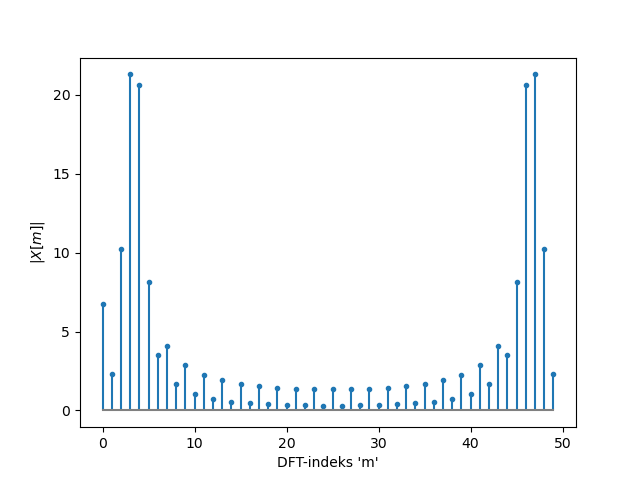

3.0


In [3]:
# WRITE YOUR CODE IN THIS CELL:
nfft = 50
x_n_padded = np.concatenate((x_n,np.zeros(int(nfft-len(x_n)))))
N = len(x_n_padded)
n = np.arange(N)

X_m = np.fft.fft(x_n_padded)


plt.close(1), plt.figure(1)
plt.stem(n, # Samplenummer (heltall fom. 0 tom. 15)
         X_m.__abs__(),   # DFT-sekvensens absoluttverdi |X[m]|
         linefmt='-',        # Linjestil stolper
         markerfmt='.',      # Punktstil for stem-markere. Default er 'o' (stor prikk)
         basefmt='grey'# Farge på y=0 aksen
         )
plt.xlabel("DFT-indeks 'm'") # Merknad på x-aksen
plt.ylabel(r"$|X[m]|$")      # Merknad på y-aksen
plt.show()

f_a = n[np.argmax(X_m.__abs__())]*fs/N
print(f_a)# Estimated wave frequency based on 50-point magnitude spectrum

In [4]:
from hashlib import sha1
assert sha1(str(int(f_a)).encode('utf-8')+b'78f94').hexdigest() == '069b3a936508d54303c329e1f066417ccc1045c8', 'Wrong answer :('
print('Correct answer :)')

Correct answer :)


*PS. [Here](Figurer/task2a_sol.png) is an example of what the magnitude spectrum stem plot may look like.*


### b)
The level of precision for the answer in task **a)** is not sufficient. You need to determine the frequency of the sinusoidal sequence $x[n] $ (in Hz), with one decimal precision. In other words, calculation needs to be based on a DFT where the resolution bandwidth $ \Delta f = 0.1 $ Hz. Create a plot of the magnitude spectrum where a degree of zero padding suitable to this task is used. Also, provide answers for both the size of your DFT (`nfft`) and the wave frequency (`f_b`) you have found.

*P.S. For large data sets, it is more appropriate to create a continuous graph with `plot()` instead of creating a bar chart with `stem()`.*
<!--
# Norwegian:
### b)
Du skal nå finne hva frekvensen til sinssekvensen $x[n]$ er (i Hz). Dette kan gjøres ved å øke oppløsningen, og identifisere hvor toppunktet til Diskret-Tids Fouriertransformen er. Svaret skal oppgis med én desimal presisjon, noe som tilsvarer en oppløsningsbåndbredde $\Delta f = 0.1Hz$. Jobb videre med kodecellen fra oppgave **a** for å løse oppgaven.

*P.S. For store datamengder er det mer hensiktsmessig å lage en kontinuerlig graf med `plot()` istedenfor å lage et spolpediagram med `stem()`.*
-->

3.5


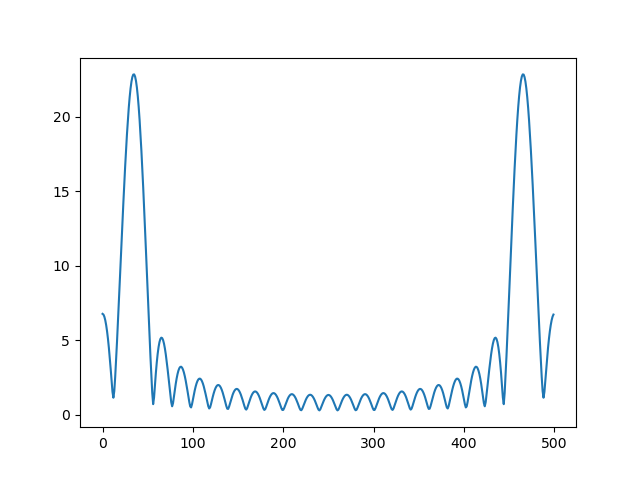

In [8]:
delta_f = 0.1
nfft = fs / delta_f# number of points in the DFT after zero padding which achieves RBW=0.1Hz

x_n_padded = np.concatenate((x_n,np.zeros(int(nfft-len(x_n)))))
# WRITE YOUR CODE IN THIS CELL:
N = len(x_n_padded)
n = np.arange(N)
X_m = np.fft.fft(x_n_padded)

plt.close(1), plt.figure(1)
plt.plot(n, X_m.__abs__())

f_b = n[np.argmax(X_m.__abs__())]*fs/N
print(f_b)# Wave frequency for the sinusoid x[n] in Hz with 1 decimal precision

In [6]:
from hashlib import sha1
assert sha1(str(round(float(nfft), 0)).encode('utf-8')+b'269e7').hexdigest() == '04d685b8ec149408f138944e10487cb394762abe', 'Wrong answer for nfft :('
print('Correct answer for nfft :)')
assert sha1(str(round(float(f_b), 1)).encode('utf-8')+b'269e7').hexdigest() == '93daa0e22758a9e6fb5fa67477d73ffd0b989556', 'Wrong answer for f_b :('
print('Correct answer for f_b :)')

Correct answer for nfft :)
Correct answer for f_b :)
